In [93]:
deps <- c("ISLR", "Metrics", "ggplot2", "tidyr", "microbenchmark", "dplyr", "patchwork", "gridExtra", "readxl", "cvTools", "leaps", "assertthat", "assertr", "testthat", "caret", "leaps", "pls", "glmnet", "ROCit", "pROC", "cutpointr", "ROCR", "tidyverse", "knitr")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}

set.seed(42)
options(scipen=999)

In [94]:
df <- read.csv("data.csv")
kable(df)



|command                            |      mean|    stddev|    median|      user|    system|       min|       max|
|:----------------------------------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
|plain: itertools.py                | 0.5674692| 0.0119883| 0.5700655| 0.5599028| 0.0074184| 0.5496380| 0.5865690|
|plain: lib.py                      | 0.1003698| 0.0026018| 0.0995592| 0.0950988| 0.0051505| 0.0976092| 0.1086287|
|plain: plain.py                    | 0.5631182| 0.0085463| 0.5607433| 0.5574100| 0.0056163| 0.5564152| 0.5863659|
|multiprocessing: imap_unordered.py | 0.2258019| 0.0085966| 0.2235880| 0.5456730| 0.1661910| 0.2184310| 0.2449692|
|multiprocessing: imap.py           | 0.2328316| 0.0065632| 0.2306093| 0.5554529| 0.1625106| 0.2235672| 0.2426373|
|multiprocessing: map_async.py      | 0.4528332| 0.0248580| 0.4485649| 1.0100400| 0.1108107| 0.4314743| 0.5167882|
|multiprocessing: map.py            | 0.4400746| 0.0043315| 0.4405771| 0.98536

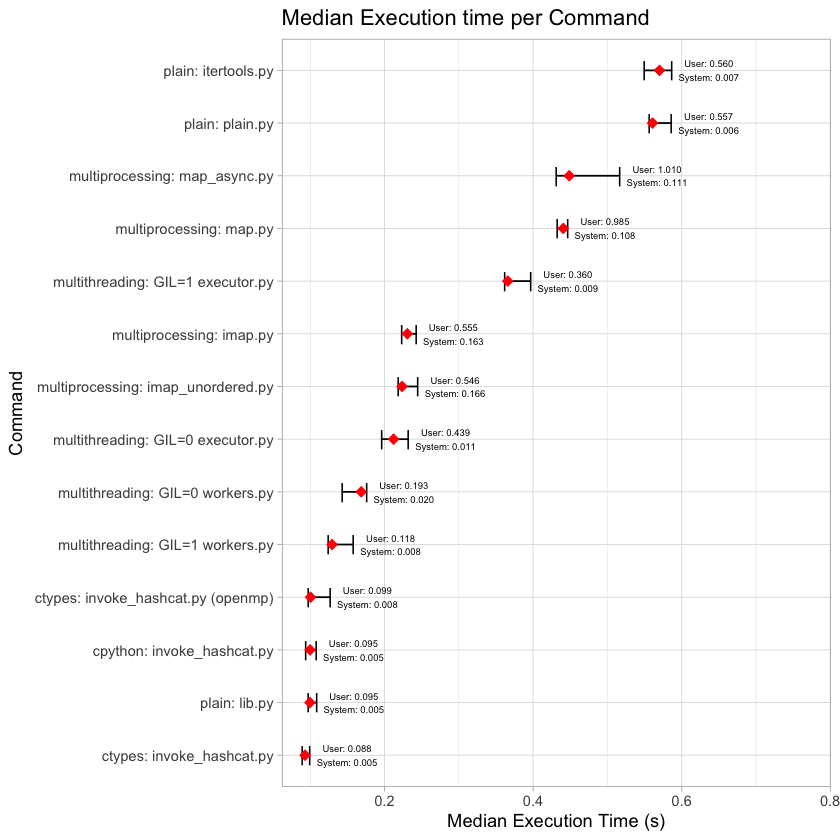

In [121]:
plot <- ggplot(df, aes(y = reorder(command, median), x = median)) +
    geom_segment(aes(x = min, xend = max, yend = command)) +
    geom_point(aes(x = min), shape = "|", size = 4) +
    geom_point(aes(x = max), shape = "|", size = 4) +
    geom_point(aes(x = median), shape = 18, size = 3, color = "red") +
    geom_text(aes(x = max + 0.05, label = sprintf("User: %.3f\nSystem: %.3f", user, system)), hjust = +0.5, size = 2) +
    labs(title = "Median Execution time per Command", x = "Median Execution Time (s)", y = "Command") +
    theme(axis.text.y = element_text(size = 8), plot.margin = margin(r = 100, unit = "pt")) +
    scale_x_continuous(expand = expansion(mult = c(0.05, 0.3))) +
    theme_light()

ggsave("./assets/perf.png", plot = plot, width = 15, height = 5)
plot